### Курсовая работа. Классическое машинное обучение
### Раздел 1. EDA

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [69]:
# Загрузить данные (предварительно переименованные в data.xlsx)
df = pd.read_excel('data.xlsx')
df.shape

(1001, 214)

#### 1. Первичный анализ данных

In [70]:
df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df.describe()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,500.000000,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,289.108111,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.000000,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,250.000000,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,500.000000,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,750.000000,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1000.000000,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [73]:
# Удалить столбец 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

**Выводы**  
- По результатам предварительного анализа можно придти к выводу, что у некоторых признаков присутствует слишком большой разброс, в связи с чем возникает необходимость в **нормализации**;
- Так как признаков очень много, по функции `describe` невозможно определить наличие пропусков.

In [74]:
# Определить количество пропусков в столбцах
df_with_nulls = df.isnull().sum()
df_with_nulls = df_with_nulls[df_with_nulls > 0].sort_values(ascending=False)
df_with_nulls

MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64

In [75]:
# Удалить пропуски
df = df.dropna()

In [76]:
# Проверить наличие дубликатов
df_duplicates = df.duplicated().sum()
if df_duplicates > 0:
    df = df.drop_duplicates()
df.shape

(966, 213)

Основными показателями, прогнозирование значений которых требуется в настоящей курсовой работе, являются:
- $IC_{50}$ (`IC50, mM`);
- $CC_{50}$ (`CC50, mM`);
- $SI$ (`SI`).

In [77]:
targets = ['IC50, mM', 'CC50, mM', 'SI']

#### 2. Распределение целевых показателей

Первоначально построим графики распределения этих признаков.

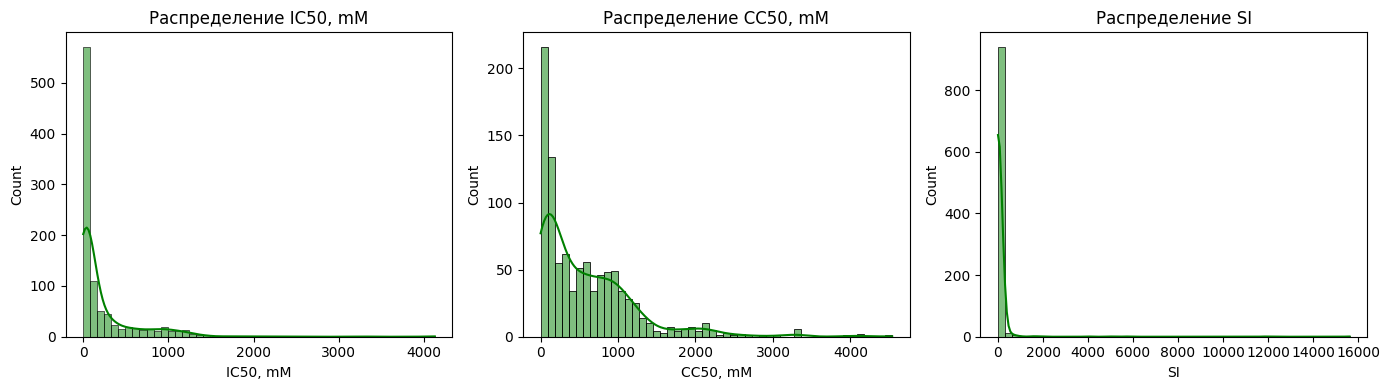

In [78]:
plt.figure(figsize=(14, 4))
for i, target in enumerate(targets, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[target], bins=50, kde=True, color='green')
    plt.title(f'Распределение {target}')
    plt.tight_layout()
plt.show()

Как мы можем заметить, подавляющая часть значений на графике находится в левой части. Имеет смысл осуществить логарифмирование.

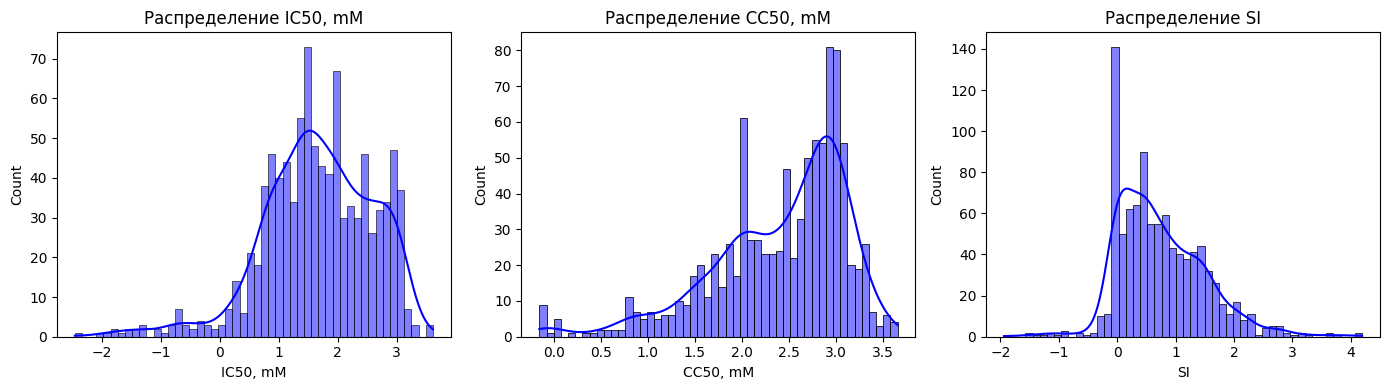

In [79]:
plt.figure(figsize=(14, 4))
for i, target in enumerate(targets, 1):
    plt.subplot(1, 3, i)
    sns.histplot(np.log10(df[target]), bins=50, kde=True, color='blue')
    plt.title(f'Распределение {target}')
    plt.tight_layout()
plt.show()

Дополнительно построим боксплоты для анализа выбросов в данных.

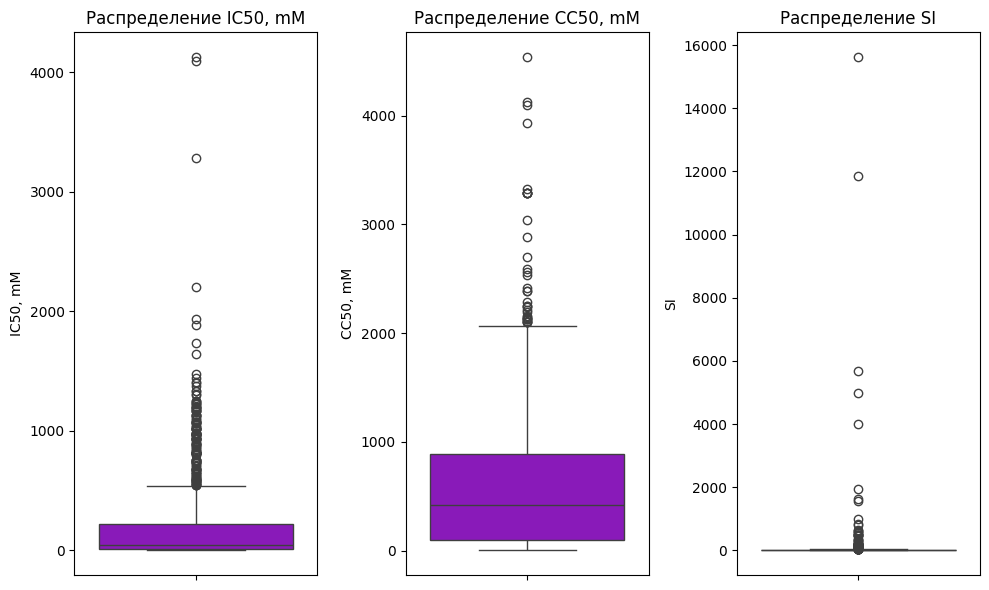

In [80]:
plt.figure(figsize=(10, 6))
for i, target in enumerate(targets, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(df[target], color='darkviolet')
    plt.title(f'Распределение {target}')
    plt.tight_layout()
plt.show()

**Выводы**
- Распределение целевых показателей не является нормальным. Логарифмирование (по основанию 10) улучшает восприятие;
- Построенные боксблоты явно указывают на наличие выбросов в данных.

#### 3. Корреляционный анализ данных

In [81]:
# Функция для определения корреляции признаков с целевыми переменными
def check_corr(cols, thres, higher:bool):
    corr_features = []

    for col in cols:
        print(f'Признак: {col}:')

        # Матрица корреляции для конкретной целевой переменной (без учета знака)
        corrs = df.corr()[col].abs().sort_values(ascending=False)

        # При нахождении сильно коррелирующих признаков перенести их в отдельный датафрейм
        if higher:
            high_corrs = corrs[corrs > thres].drop(col)
            corr_features.append(high_corrs.index.tolist())
            print(f"Корреляция > {thres} с {col}: {high_corrs.sort_values(ascending=False).tolist()}\n")
        else:
            high_corrs = corrs[corrs < thres].index
            print(f"Корреляция < {thres} с {col}: {high_corrs.sort_values(ascending=False)}\n")

In [82]:
check_corr(targets, 0.9, higher=True)

Признак: IC50, mM:
Корреляция > 0.9 с IC50, mM: []

Признак: CC50, mM:
Корреляция > 0.9 с CC50, mM: []

Признак: SI:
Корреляция > 0.9 с SI: []



In [83]:
check_corr(targets, 0.01, higher=False)

Признак: IC50, mM:
Корреляция < 0.01 с IC50, mM: Index(['fr_thiophene', 'fr_oxime', 'fr_oxazole', 'fr_nitro_arom_nonortho',
       'fr_nitro_arom', 'fr_morpholine', 'fr_methoxy', 'fr_aryl_methyl',
       'fr_amide', 'fr_aldehyde', 'fr_NH1', 'fr_Al_OH_noTert', 'TPSA',
       'SlogP_VSA2', 'PEOE_VSA9', 'NumHAcceptors'],
      dtype='object')

Признак: CC50, mM:
Корреляция < 0.01 с CC50, mM: Index(['fr_sulfone', 'fr_piperdine', 'fr_nitro_arom_nonortho', 'fr_nitro_arom',
       'fr_imidazole', 'fr_hdrzine', 'fr_azo', 'fr_aldehyde', 'SMR_VSA3', 'SI',
       'PEOE_VSA4', 'PEOE_VSA13', 'NumSaturatedCarbocycles',
       'NumAromaticHeterocycles', 'EState_VSA11'],
      dtype='object')

Признак: SI:
Корреляция < 0.01 с SI: Index(['fr_urea', 'fr_unbrch_alkane', 'fr_tetrazole', 'fr_term_acetylene',
       'fr_sulfone', 'fr_priamide', 'fr_piperzine', 'fr_oxime', 'fr_oxazole',
       'fr_nitro_arom_nonortho', 'fr_nitrile', 'fr_hdrzine', 'fr_epoxide',
       'fr_azo', 'fr_amidine', 'fr_aldehyde', 'f

**Выводы:**
- Признаков, имеющих высокую корреляцию (более 0.9) с целевыми переменными - не выявлено;
- Найдено значительное количество признаков, практически не имеющих линейной зависимости с целевыми параметрами.

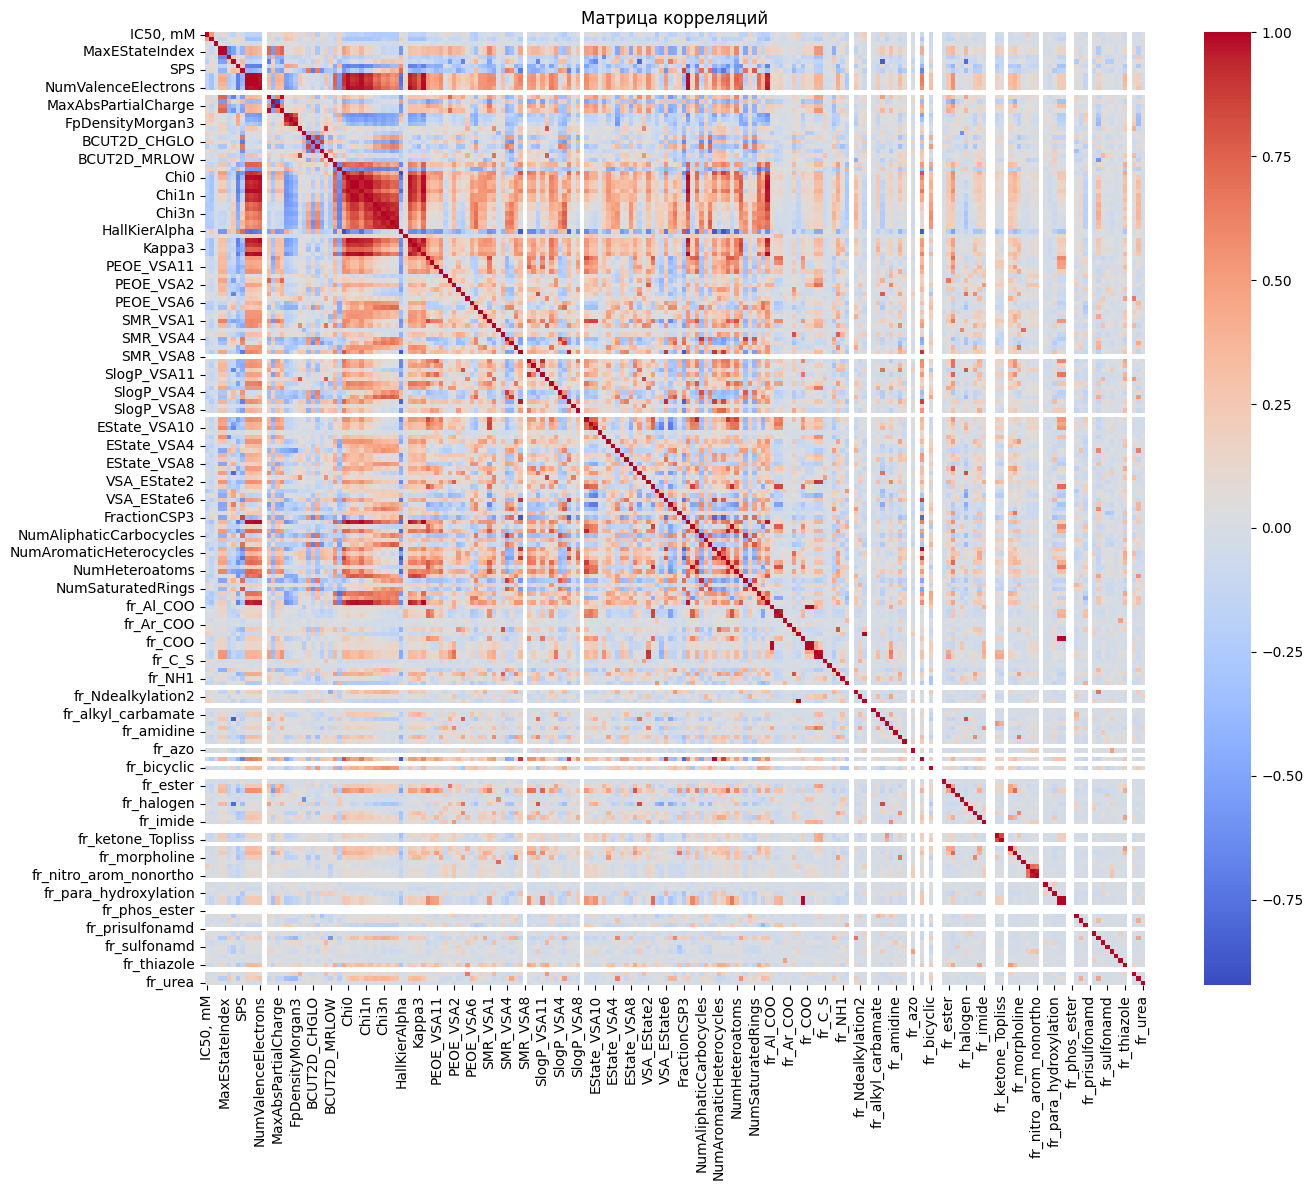

In [84]:
# Построить корреляционную матрицу
corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Матрица корреляций")
plt.tight_layout()
plt.show()

Ввиду большого количества признаков в данных сложно произвести подробный анализ корреляций только по одной матрице. С целью сокращения общего числа признаков проанализируем признаки попарно.

In [85]:
# Задать корреляционный предел
thres = 0.9
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > thres:
            pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            corr_pairs.append(pair)

print(f"Threshold = {thres}:\n")
for i, pair in enumerate(corr_pairs):
    print(f"{i + 1}. [{pair[0]} | {pair[1]}] {pair[2]:.3f}")

Threshold = 0.9:

1. [MaxAbsEStateIndex | MaxEStateIndex] 1.000
2. [MolWt | HeavyAtomMolWt] 0.997
3. [MolWt | ExactMolWt] 1.000
4. [MolWt | NumValenceElectrons] 0.981
5. [MolWt | BertzCT] 0.902
6. [MolWt | Chi0] 0.987
7. [MolWt | Chi0n] 0.935
8. [MolWt | Chi0v] 0.954
9. [MolWt | Chi1] 0.987
10. [MolWt | Chi1n] 0.905
11. [MolWt | Chi1v] 0.927
12. [MolWt | Kappa1] 0.960
13. [MolWt | Kappa2] 0.907
14. [MolWt | LabuteASA] 0.988
15. [MolWt | HeavyAtomCount] 0.989
16. [MolWt | MolMR] 0.957
17. [HeavyAtomMolWt | ExactMolWt] 0.997
18. [HeavyAtomMolWt | NumValenceElectrons] 0.966
19. [HeavyAtomMolWt | BertzCT] 0.924
20. [HeavyAtomMolWt | Chi0] 0.978
21. [HeavyAtomMolWt | Chi0n] 0.906
22. [HeavyAtomMolWt | Chi0v] 0.929
23. [HeavyAtomMolWt | Chi1] 0.982
24. [HeavyAtomMolWt | Kappa1] 0.940
25. [HeavyAtomMolWt | LabuteASA] 0.977
26. [HeavyAtomMolWt | HeavyAtomCount] 0.983
27. [HeavyAtomMolWt | MolMR] 0.937
28. [ExactMolWt | NumValenceElectrons] 0.981
29. [ExactMolWt | BertzCT] 0.902
30. [ExactMolWt

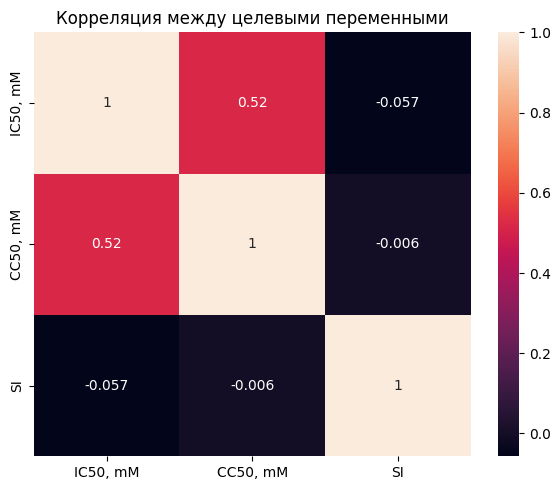

In [86]:
# Проверить наличие корреляции между тремя целевыми показателями
corr_matrix_target = df[targets].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix_target, annot=True)
plt.title("Корреляция между целевыми переменными")
plt.tight_layout()
plt.show()

**Выводы:**
- Выявлены 154 пары признаков с высокой линейной зависимостью между собой (при лимите корреляции от 0.9);
- Целевые переменные не имеют между собой значительных линейных связей.

#### 4. Поиск выбросов

In [87]:
# Функция для определения выбросов по правилу трех сигм
def check_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()

In [88]:
# Определить число выбросов для всех целевых переменных
outliers_ic50 = check_outliers(df, 'IC50, mM')
outliers_cc50 = check_outliers(df, 'CC50, mM')
outliers_si = check_outliers(df, 'SI')

print(f'Outliers (IC50): {len(outliers_ic50)}/{len(df)}')
print(f'Outliers (CC50): {len(outliers_cc50)}/{len(df)}')
print(f'Outliers (SI): {len(outliers_si)}/{len(df)}')

Outliers (IC50): 140/966
Outliers (CC50): 35/966
Outliers (SI): 119/966


In [89]:
# Определить число выбросов для остальных признаков
features_with_outliers = {}
features_with_outliers_counts = {}
i = 0
for col in df.columns[3:]:
    feature = check_outliers(df, col)
    if len(feature) > 0:
        i = i + 1
        features_with_outliers[col] = feature
        features_with_outliers_counts[col] = len(feature)
        print(f'{i}. {col}: {len(feature)}/{len(df)}')

# Отсортировать словарь по количеству выбросов (по убыванию)
# Отобразить первые 40 признаков по количеству выбросов
features_with_outliers_counts = dict(sorted(features_with_outliers_counts.items(), key=lambda x: x[1], reverse=True)[:40])

1. MaxAbsEStateIndex: 60/966
2. MaxEStateIndex: 60/966
3. MinAbsEStateIndex: 21/966
4. MinEStateIndex: 121/966
5. MolWt: 38/966
6. HeavyAtomMolWt: 37/966
7. ExactMolWt: 38/966
8. NumValenceElectrons: 45/966
9. MinPartialCharge: 5/966
10. MaxAbsPartialCharge: 4/966
11. FpDensityMorgan1: 3/966
12. FpDensityMorgan2: 31/966
13. FpDensityMorgan3: 50/966
14. BCUT2D_MWHI: 39/966
15. BCUT2D_MWLOW: 11/966
16. BCUT2D_CHGHI: 28/966
17. BCUT2D_CHGLO: 3/966
18. BCUT2D_LOGPHI: 4/966
19. BCUT2D_LOGPLOW: 37/966
20. BCUT2D_MRHI: 55/966
21. BCUT2D_MRLOW: 69/966
22. BalabanJ: 36/966
23. BertzCT: 34/966
24. Chi0: 34/966
25. Chi0n: 53/966
26. Chi0v: 62/966
27. Chi1: 38/966
28. Chi1n: 46/966
29. Chi1v: 51/966
30. Chi2n: 31/966
31. Chi2v: 24/966
32. Chi3n: 51/966
33. Chi3v: 40/966
34. Chi4n: 50/966
35. Chi4v: 55/966
36. HallKierAlpha: 2/966
37. Ipc: 200/966
38. Kappa1: 42/966
39. Kappa2: 59/966
40. Kappa3: 62/966
41. LabuteASA: 47/966
42. PEOE_VSA1: 40/966
43. PEOE_VSA10: 52/966
44. PEOE_VSA11: 120/966
45. P

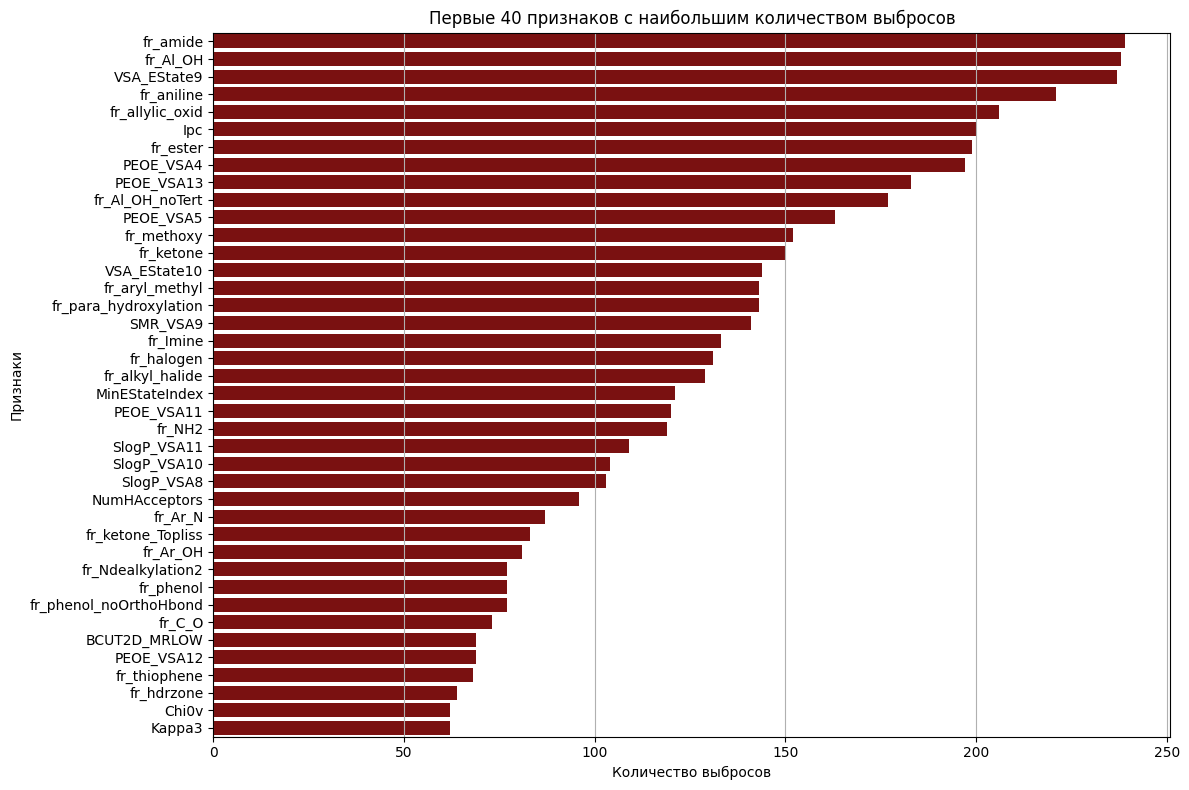

In [90]:
# Визуально отобразить признаки с наибольшим количеством выбросов
plt.figure(figsize=(12, 8))
sns.barplot(
    x=list(features_with_outliers_counts.values()), 
    y=list(features_with_outliers_counts.keys()),
    color='darkred')
plt.title("Первые 40 признаков с наибольшим количеством выбросов")
plt.xlabel("Количество выбросов")
plt.ylabel("Признаки")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**Выводы:**
- В данных обнаружено существенное количество выбросов, обнаруженных по правилу трех сигм (в 183 признаках);
- Очистка данных от выбросов будет осуществлена сразу после отбора наиболее значимых признаков.

#### 5. Обработка данных (отбор наиболее значимых признаков)

In [ ]:
# Удалить признаки с нулевой дисперсией
features_variance = df.var()[df.var() == 0].index.tolist()
print(features_variance)

df = df.loc[:, df.var() != 0]
print(df.shape)

(966, 195)

Вернемся к списку `corr_pairs`, полученному в подразделе 3. Рассчитаем количество пар для каждого отдельного признака в этом списке.

In [92]:
corr_pairs_count = {}
for feature in corr_pairs:
    corr_pairs_count[feature[0]] = corr_pairs_count.get(feature[0], 0) + 1
    corr_pairs_count[feature[1]] = corr_pairs_count.get(feature[1], 0) + 1

# Отсортировать словарь по количеству выбросов (по убыванию)
corr_pairs_count = dict(sorted(corr_pairs_count.items(), key=lambda x: x[1], reverse=True))

print(f'Количество наиболее коррелирующих между собой признаков - {len(corr_pairs_count)}')

Количество наиболее коррелирующих между собой признаков - 64


In [93]:
# На основе corr_pairs подготовить столбцы для удаления
drop_cols = []
for col1, col2, val in corr_pairs:
    drop_cols.append(col2)
drop_cols = list(set(drop_cols))

# Удалить столбцы из списка
df = df.drop(drop_cols, axis=1)
df.shape

(966, 148)

#### 6. Удаление выбросов, нормализация и сохранение данных

Для устранения выбросов в целевых переменных и дальнейшего выполнения задания разделим основной датафрейм на 3 части (по IC50, CC50 и SI) и выполним нормализацию остальных признаков.

In [94]:
# Разбить датафрейм и устранить выбросы
df_ic50 = df.drop(columns=['CC50, mM', 'SI'])
df_ic50 = df_ic50.drop(outliers_ic50)
df_cc50 = df.drop(columns=['IC50, mM', 'SI'])
df_cc50 = df_cc50.drop(outliers_cc50)
df_si = df.drop(columns=['CC50, mM', 'IC50, mM'])
df_si = df_si.drop(outliers_si)

In [95]:
# Выполнить нормализацию
sc = StandardScaler()

X_ic50 = df_ic50.drop(columns=['IC50, mM'])
X_ic50_scaled = sc.fit_transform(X_ic50)
df_ic50_scaled = pd.DataFrame(X_ic50_scaled, columns=X_ic50.columns)
df_ic50_scaled['IC50, mM'] = df_ic50['IC50, mM'].values

X_cc50 = df_cc50.drop(columns=['CC50, mM'])
X_cc50_scaled = sc.fit_transform(X_cc50)
df_cc50_scaled = pd.DataFrame(X_cc50_scaled, columns=X_cc50.columns)
df_cc50_scaled['CC50, mM'] = df_cc50['CC50, mM'].values

X_si = df_si.drop(columns=['SI'])
X_si_scaled = sc.fit_transform(X_si)
df_si_scaled = pd.DataFrame(X_si_scaled, columns=X_si.columns)
df_si_scaled['SI'] = df_si['SI'].values

In [96]:
display(df_ic50_scaled.head())
print(df_ic50_scaled.shape)

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM"
0,-1.660292,1.160311,0.838612,-0.700360,1.055009,0.205849,-1.502148,1.494888,-2.031080,-0.565772,...,-0.222073,-0.09245,-0.09245,-0.034816,0.0,-0.259198,-0.272254,2.267263,-0.078039,6.239374
1,-1.993065,2.006622,0.939393,-0.491142,1.237252,0.236943,-1.706545,1.236198,-2.181446,-0.555914,...,-0.222073,-0.09245,-0.09245,-0.034816,0.0,-0.259198,-0.272254,2.267263,-0.078039,0.771831
2,-2.385072,2.060654,0.945827,-1.425902,0.995923,0.685190,-1.061511,1.077899,-2.369403,-0.531481,...,-0.222073,-0.09245,-0.09245,-0.034816,0.0,-0.259198,-0.272254,2.267263,-0.078039,223.808778
3,-1.659333,1.179805,0.840933,-0.883631,0.969976,0.314024,-1.502148,1.494888,-2.124410,-0.565840,...,-0.222073,-0.09245,-0.09245,-0.034816,0.0,-0.259198,-0.272254,3.083280,-0.078039,1.705624
4,-1.643718,0.486530,0.758377,-0.646206,0.543590,0.838696,-1.312738,1.967023,-2.211519,-0.565202,...,-0.222073,-0.09245,-0.09245,-0.034816,0.0,-0.259198,-0.272254,-0.180788,-0.078039,107.131532


(826, 146)


In [97]:
display(df_cc50_scaled.head())
print(df_cc50_scaled.shape)

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"CC50, mM"
0,-1.788262,1.268590,0.870224,-0.748934,1.097097,0.219317,-1.590886,1.549443,-2.056082,-0.588938,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,2.292130,-0.080539,175.482382
1,-2.133320,2.150705,0.962811,-0.539712,1.279553,0.251255,-1.795634,1.286626,-2.205560,-0.578681,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,2.292130,-0.080539,5.402819
2,-2.539798,2.207023,0.968722,-1.474490,1.037941,0.711670,-1.149492,1.125802,-2.392406,-0.553258,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,2.292130,-0.080539,161.142320
3,-1.787268,1.288909,0.872357,-0.932208,1.011964,0.330428,-1.590886,1.549443,-2.148861,-0.589009,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,3.111943,-0.080539,107.855654
4,-1.771076,0.566304,0.796513,-0.694778,0.585080,0.869343,-1.401150,2.029111,-2.235455,-0.588345,...,-0.208596,-0.11427,-0.0988,-0.032791,-0.032791,-0.243224,-0.280704,-0.167309,-0.080539,139.270991


(931, 146)


In [98]:
display(df_si_scaled.head())
print(df_si_scaled.shape)

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,SI
0,-1.812779,1.202897,0.868409,-0.729005,1.094277,0.225177,-1.586455,1.520873,-2.063487,-0.593331,...,-0.221947,-0.091287,-0.091287,-0.034381,-0.034381,-0.247797,-0.281035,2.629564,-0.07706,28.125
1,-2.159098,2.055029,0.960485,-0.517805,1.272861,0.256636,-1.789985,1.261644,-2.213061,-0.583101,...,-0.221947,-0.091287,-0.091287,-0.034381,-0.034381,-0.247797,-0.281035,2.629564,-0.07706,7.000
2,-2.567062,2.109433,0.966363,-1.461422,1.036377,0.710135,-1.147686,1.103015,-2.400029,-0.557746,...,-0.221947,-0.091287,-0.091287,-0.034381,-0.034381,-0.247797,-0.281035,2.629564,-0.07706,0.720
3,-1.795530,0.524481,0.795104,-0.674338,0.593127,0.865439,-1.397847,1.993992,-2.242976,-0.592739,...,-0.221947,-0.091287,-0.091287,-0.034381,-0.034381,-0.247797,-0.281035,-0.140636,-0.07706,1.300
4,-1.609664,0.568684,0.799880,0.645806,-0.025219,-0.181798,-1.397847,0.149177,-0.735268,-0.593425,...,-0.221947,-0.091287,-0.091287,-0.034381,-0.034381,-0.247797,-0.281035,-0.140636,-0.07706,2.000


(847, 146)


In [99]:
# Сохранить данные в csv
df_ic50_scaled.to_csv('ic50.csv', index=False)
df_cc50_scaled.to_csv('cc50.csv', index=False)
df_si_scaled.to_csv('si.csv', index=False)